<a href="https://colab.research.google.com/github/ZachGendreau/Ecommerce_Losss_Prevention/blob/main/LP_MFA_Bullion_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# prompt: connect to drive

from google.colab import drive
drive.mount('/content/drive')

ValueError: The domain policy has disabled Drive File Stream: https://support.google.com/a/answer/7496409

In [9]:
df = pd.read_csv("Jewelery_EDA_v1.csv")

In [11]:
df.columns

Index(['RecordID', 'ORDER_DATE', 'HOUR', 'ORDER_NUMBER', 'ORDER_TYPE',
       'ORDER_STATUS', 'WHS', 'DEPT', 'CAT', 'ITEM_NUMBER', 'ITEM_DESC',
       'ITEM_PRICE', 'ORDERED_QTY', 'CANCELLED_QTY', 'NAME', 'Length',
       'SOURCESHIPCODE', 'ITEM_CT', 'REASON_CODE', 'HOLD_AUDIT', 'EXCLUDE',
       'HA_DATE', 'HA_DATE/TIME', 'MAX_TIME', 'Max_MAX_TIME', 'CDDEPT',
       'Dept Desc', 'Cat Code', 'CAT I Desc', 'CAT II Desc', 'CAT III Desc',
       'HOLD_AUDIT_CT', 'HOLD_AUDIT II', 'OIL CANCEL', 'METHOD DETAIL',
       'SALES', 'TIME_FRAME', 'LP CAN REASON', 'Date Check', 'Max_ORDER_DATE'],
      dtype='object')

In [13]:
df.shape

(26253, 40)

In [14]:
df.head(1)

,RecordID,ORDER_DATE,HOUR,ORDER_NUMBER,ORDER_TYPE,ORDER_STATUS,WHS,DEPT,CAT,ITEM_NUMBER,...,CAT III Desc,HOLD_AUDIT_CT,HOLD_AUDIT II,OIL CANCEL,METHOD DETAIL,SALES,TIME_FRAME,LP CAN REASON,Date Check,Max_ORDER_DATE
0,22,2025-05-28,5,1199571404,1,Ordered,847,35,LLL,1943074,...,GOLD BULLION,NaN,NaN,NaN,SMALL PACK - JEWELRY,3369.99,WEEK3,NaN,2025-06-18,2025-06-18


In [17]:
df2 = df[['RecordID', 'ORDER_DATE', 'HOUR', 'ITEM_NUMBER', 'ITEM_DESC',
       'ITEM_PRICE', 'ORDERED_QTY', 'CANCELLED_QTY', 'NAME', 'Length',
       'SOURCESHIPCODE', 'ITEM_CT', 'REASON_CODE', 'HOLD_AUDIT', 'EXCLUDE',
       'HA_DATE', 'HA_DATE/TIME', 'MAX_TIME', 'Max_MAX_TIME', 'CDDEPT',
       'Dept Desc',
       'HOLD_AUDIT_CT', 'HOLD_AUDIT II', 'OIL CANCEL', 'METHOD DETAIL',
       'SALES', 'TIME_FRAME', 'LP CAN REASON', 'Date Check', 'Max_ORDER_DATE']]

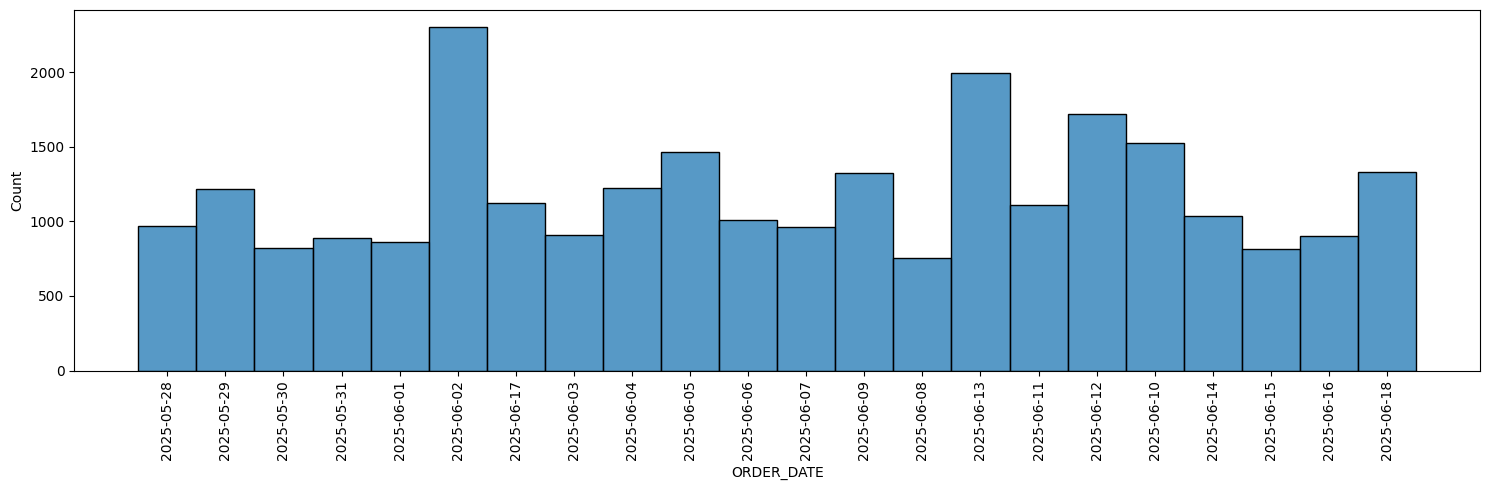

In [21]:
plt.figure(figsize=(15, 5))
sns.histplot(data=df2[df2['ORDER_DATE'] >= (pd.to_datetime(df2['ORDER_DATE']).max() - pd.Timedelta(days=21)).strftime('%Y-%m-%d')], x='ORDER_DATE')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

/tmp/ipython-input-22-707008584.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ORDER_DATE'] = pd.to_datetime(df2['ORDER_DATE'])


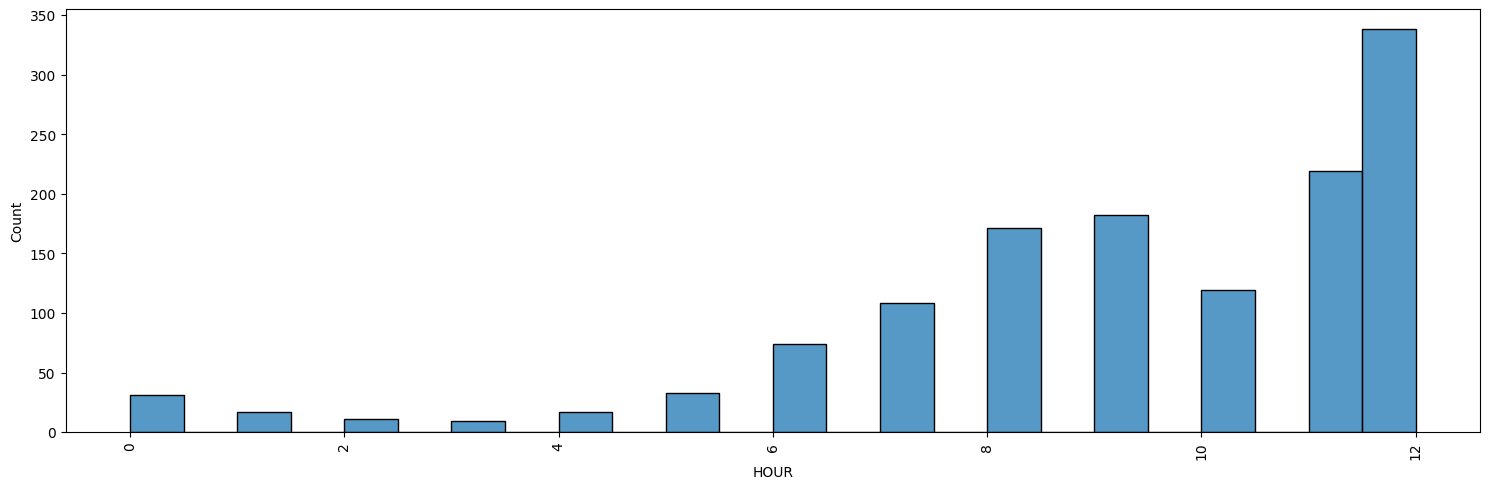

In [22]:

df2['ORDER_DATE'] = pd.to_datetime(df2['ORDER_DATE'])
plt.figure(figsize=(15, 5))
sns.histplot(data=df2[df2['ORDER_DATE'].dt.date == df2['ORDER_DATE'].max().date()], x='HOUR', bins=24)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [24]:
df_cancelled = df2[df2['ORDER_STATUS'] == 'Cancelled']
df_cancelled.shape

(1897, 36)

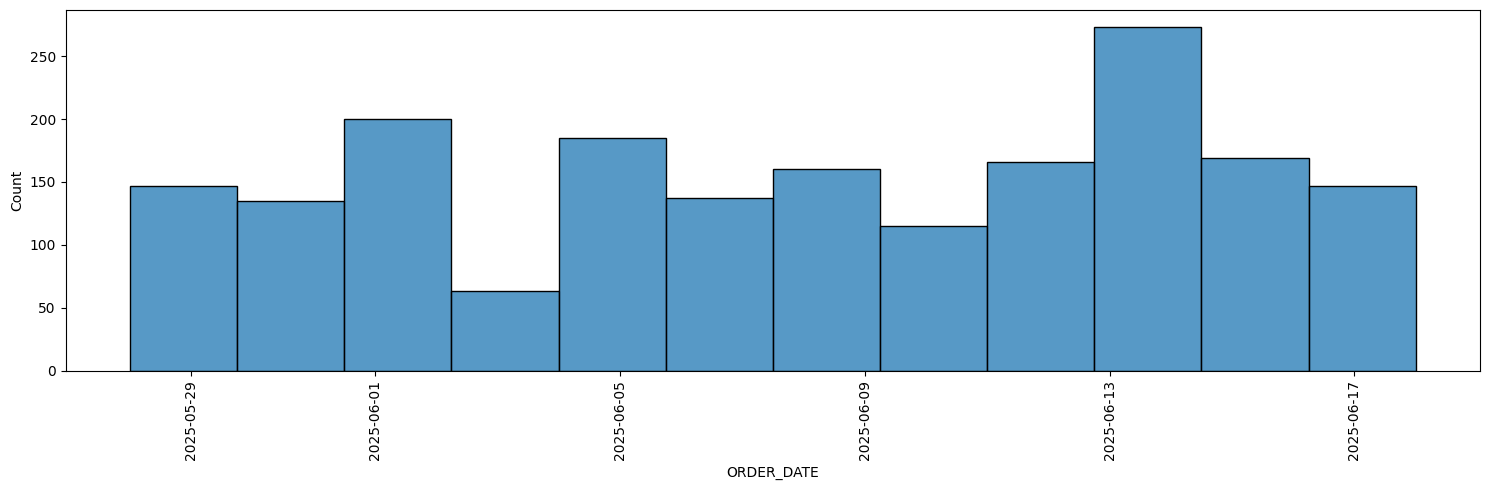

In [28]:
plt.figure(figsize=(15, 5))
sns.histplot(data=df_cancelled, x='ORDER_DATE')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [32]:
print(np.average(df_cancelled['ITEM_PRICE'])),
print(np.average(df_cancelled['ORDERED_QTY'])),


3004.695239852398
1.4786505007907222


#Orders

## Orders (Past 21)

## Sales (Past 21)

##Units (Past 21)

#Cancels